In [1]:
#-*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt
import math
# 将列表中的数据切片读入矩阵
def Read(lines,m,n):
    A = np.zeros((m, n))
    A_row = 0  # 表示矩阵的行，从0行开始
    for line in lines:  # 把lines中的数据逐行读取出来
        list = line.strip('\n').split('\t')  # 处理逐行数据：strip表示把头尾的'\n'去掉，split表示以空格来分割行数据，然后把处理后的行数据返回到list列表中
        A[A_row:] = list[0:5]  # 把处理后的数据放到方阵A中。list[0:4]表示列表的0,1,2,3列数据放到矩阵A中的A_row行
        A_row += 1  # 然后方阵A的下一行接着读
    return A 
def DataInit(): 
    f = open("test.txt")
    lines = f.readlines() # 把全部数据文件读到一个列表lines中
    Line = len(lines) # 读取训练集合测试集的行数
    A = Read(lines,Line,5)
    return A

In [2]:
'''1.数据初始化'''
A = DataInit() # 四特征样本集(75*5矩阵)
id = np.mat(A[:,0]).transpose() # 记录样本集的标号(75*1列向量)
print(A.shape)
print(id)

(75, 5)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]


In [3]:
'''2.利用主成分分析方法进行样本降维'''

'''（1）计算协方差矩阵和均值向量'''
means = np.mean(A[:,1:],axis=0) # 特征均值
cov = np.cov(A[:,1:],rowvar=False) # 特征方差
print(means)
print(cov)

[5.80666667 3.02266667 3.77066667 1.19866667]
[[ 0.70468468 -0.04082883  1.33600901  0.52676577]
 [-0.04082883  0.18420901 -0.30973153 -0.11996937]
 [ 1.33600901 -0.30973153  3.26588468  1.34469009]
 [ 0.52676577 -0.11996937  1.34469009  0.59013333]]


In [4]:
'''（2）计算协方差矩阵的特征值、特征向量以及各主成分贡献率'''
val,vec = np.linalg.eig(cov) # 特征值与特征向量(原理：AX=λX )
val_rate = val/np.sum(val) # 贡献率
print(val)
print(vec)
print(val_rate)

[4.40996706 0.23527915 0.07995841 0.01970709]
[[ 0.36102252 -0.65349778 -0.58615578  0.31468204]
 [-0.07652445 -0.72955212  0.63186007 -0.25030095]
 [ 0.85910035  0.15772099  0.09715333 -0.47710786]
 [ 0.35461717  0.12577138  0.49773033  0.78146832]]
[0.92940972 0.04958557 0.0168514  0.00415331]


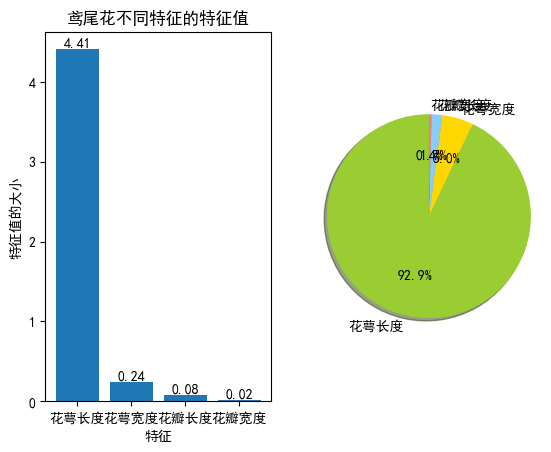

In [5]:
'''（3）可视化特征值的贡献率'''
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure()
# 柱状图
plt.subplot(1,2,1)
plt.ylabel("特征值的大小")
plt.xlabel("特征")
x = ["花萼长度","花萼宽度","花瓣长度","花瓣宽度"]
y = np.around(val, 2)
Bar = plt.bar(x, y)
plt.bar_label(Bar)
plt.title("鸢尾花不同特征的特征值")
# 饼状图
plt.subplot(1,2,2)
x = ["花萼长度","花萼宽度","花瓣长度","花瓣宽度"]
y = val_rate*100 # 转换成xx%
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(y,labels=x, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # 显示为圆（避免比例压缩为椭圆）
plt.show()

In [6]:
'''（4）求解变换后的二维新特征'''
'''因为保留信息要求>80%，而单独第一个特征就已经是92.9%,所以选取二维特征足矣。'''
index = np.argsort(-val) # 降序排序返回下角标
index = index[:2] # 取出前两大特征
A_new = np.dot(A[:,1:],vec[index].transpose())
A_new = np.concatenate((id,A_new),axis=1) # 插入标签
print(A_new)

[[ 1.         -1.03029358 -1.61036267]
 [ 1.         -1.22875628 -1.95224371]
 [ 1.         -1.22622239 -2.05362963]
 [ 1.         -1.10225703 -2.04386042]
 [ 1.         -1.26929989 -1.73331576]
 [ 1.         -1.16784786 -1.66801299]
 [ 1.         -1.0257317  -2.0460395 ]
 [ 1.         -1.64978926 -2.4663308 ]
 [ 1.         -1.5167485  -2.65045945]
 [ 1.         -1.07313003 -1.73885145]
 [ 1.         -0.92653082 -2.00901712]
 [ 1.         -1.00068447 -2.20295897]
 [ 1.         -1.37273155 -2.14178342]
 [ 1.         -1.07106036 -1.75400602]
 [ 1.         -1.19697486 -1.97302197]
 [ 1.         -1.14972753 -2.18972685]
 [ 1.         -0.54604145 -1.27600208]
 [ 1.         -1.20175991 -1.89991645]
 [ 1.         -1.23116965 -2.07525911]
 [ 1.         -1.62989988 -2.06215898]
 [ 1.         -0.95379872 -1.74645989]
 [ 1.         -1.51698955 -2.20165681]
 [ 1.         -1.18817099 -1.85203533]
 [ 1.         -1.32081969 -2.2071925 ]
 [ 1.         -1.10911176 -1.95560032]
 [ 2.         -1.71627528

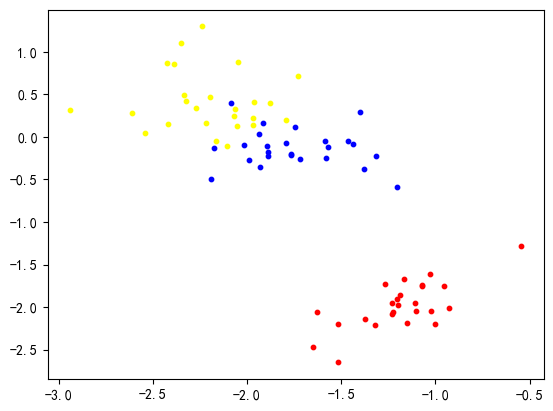

In [7]:
'''（5）降维后的新特征在新的特征空间画出样本点'''
plt.figure()
size = 10 # 点的大小
for item in A_new: 
    if item[0,0]==1.0: # 第一类
        plt.scatter(item[0,1], item[0,2],c='red',s=size)
    elif item[0,0]==2.0: # 第二类
        plt.scatter(item[0,1], item[0,2],c='blue',s=size)
    elif item[0,0]==3.0: # 第三类
        plt.scatter(item[0,1], item[0,2],c='yellow',s=size)

In [8]:
'''3.k均值聚类实现'''
'''（1）算法初始化'''
A = A_new
# z1 = [A[18,1],A[18,2]]
# z2 = [A[49,1],A[49,2]]
# z3 = [A[66,1],A[66,2]]
z1 = [A[20,1],A[40,2]]
z2 = [A[30,1],A[40,2]]
z3 = [A[40,1],A[40,2]]
print(z1)
print(z2)
print(z3)

[-0.9537987213264284, 0.16210318811209223]
[-1.464012529272518, 0.16210318811209223]
[-1.9149373509670398, 0.16210318811209223]


In [9]:

def get_dis(item,z):
    return math.sqrt(math.pow(item[0,1]-z[0],2)+math.pow(item[0,2]-z[1],2))
def get_center(res):
    x,y = 0,0
    num = len(res)
    for item in res:
        x += item[0,1]
        y += item[0,2]
    x,y = x/num, y/num
    return [x,y]
count =1
'''（2）根据聚类中心进行聚类的迭代过程'''
while 1:
    res1,res2,res3 = [],[],[]
    for item in A:
        dis = [get_dis(item,z1),get_dis(item,z2),get_dis(item,z3)]
        min_index = dis.index(min(dis))+1
        if min_index == 1:
            res1.append(item)
        elif min_index == 2:
            res2.append(item)
        elif min_index == 3:
            res3.append(item)
    '''计算新的聚类中心'''
    old1 ,old2 ,old3 =z1,z2,z3
    z1,z2,z3 =get_center(res1),get_center(res2),get_center(res3)
    if old1 == z1 and old2 == z2 and old3 == z3:
        print("质心在第%d次迭代中确定下来，迭代完毕！"%count)
        break
    else:
        print("第%d次迭代中质心发生变化，继续迭代"%count)
        count += 1
    print("now:",z1,z2,z3)
    print("old:",old1,old2,old3)
print("最终三类质心为：")
print(z1,z2,z3)

第1次迭代中质心发生变化，继续迭代
now: [-1.05924798436059, -1.7849861164511625] [-1.4273515173390996, -1.2435130709682864] [-2.091641056510085, 0.2052468949974547]
old: [-0.9537987213264284, 0.16210318811209223] [-1.464012529272518, 0.16210318811209223] [-1.9149373509670398, 0.16210318811209223]
第2次迭代中质心发生变化，继续迭代
now: [-1.1882219078258773, -1.980396088875668] [-1.291487871560777, -0.4828606957580296] [-2.0022719779170464, 0.16557777432615936]
old: [-1.05924798436059, -1.7849861164511625] [-1.4273515173390996, -1.2435130709682864] [-2.091641056510085, 0.2052468949974547]
第3次迭代中质心发生变化，继续迭代
now: [-1.1882219078258773, -1.980396088875668] [-1.4585954747245236, -0.24363363872459676] [-2.0719825448891336, 0.21264478299848483]
old: [-1.1882219078258773, -1.980396088875668] [-1.291487871560777, -0.4828606957580296] [-2.0022719779170464, 0.16557777432615936]
第4次迭代中质心发生变化，继续迭代
now: [-1.1882219078258773, -1.980396088875668] [-1.5869209909100748, -0.18364305377166165] [-2.139663309128247, 0.2781902166489862]
old: 

In [10]:
'''（3）测试准确率'''
def count_accuracy(true,false,res,id):
    for item in res:
        if item[0,0] == id:
            true += 1
        else:
            false += 1
    return true,false
true,false = 0,0
true,false = count_accuracy(true,false,res1,id=1)
true,false = count_accuracy(true,false,res2,id=2)
true,false = count_accuracy(true,false,res3,id=3)
print("基于k均值算法对三类样本进行分类：")
print("正确个数：",true)
print("错误个数：",false)
print("准确率：",true/(true+false),'\n')


基于k均值算法对三类样本进行分类：
正确个数： 68
错误个数： 7
准确率： 0.9066666666666666 



In [15]:
for item in res1,res2,res3:
    for i in item:
        print(i[0,1])

-1.0302935764690737
-1.2287562827472207
-1.2262223856861332
-1.1022570291892033
-1.2692998903459927
-1.1678478595855681
-1.0257316952303668
-1.6497892597818966
-1.5167484993558316
-1.0731300291369232
-0.9265308209074843
-1.0006844724327746
-1.372731546735758
-1.0710603563277683
-1.1969748596378482
-1.1497275305434873
-0.5460414514715802
-1.201759913136478
-1.2311696538123045
-1.6298998782862941
-0.9537987213264284
-1.516989551347842
-1.188170986516913
-1.3208196901387728
-1.1091117554969885
-1.7162752813284192
-1.7478335321778684
-1.9374618865188902
-1.8946863914834224
-1.3781290507609993
-1.464012529272518
-1.4368651548495792
-1.5789024818403115
-2.176649684024196
-2.1899670798355597
-1.8899013379847922
-1.3986017932357815
-1.9329192742810286
-1.5836570565227506
-1.9149373509670398
-2.0140176992939174
-1.5721682815285314
-1.3175643258552743
-1.79548551716054
-1.9869008036871696
-1.8900828216131793
-1.7681871379254046
-1.2048466923605545
-1.7661174651162495
-1.9674756464434995
-2.10457